In [ ]:
pip install vaderSentiment

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1]:
import pandas as pd
import numpy as np
import random as rd
import io
import re 
import os
import string
import sqlite3
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import word_tokenize  
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import *
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer        

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import files
uploaded = files.upload()

Saving USvideos.csv to USvideos (12).csv


In [3]:
df2 = pd.read_csv(io.BytesIO(uploaded['USvideos.csv']))

In [4]:
#transform to lowercase
df2['descriptiontl'] = df2['description'].str.lower()
df2[['descriptiontl','description']].head(10)

,descriptiontl,description
0,want one nd mini album promise you boomerang...,want One nd Mini Album PROMISE YOU BOOMERANG...
1,give yourself try available now http lnk ...,Give Yourself Try Available now http lnk ...
2,instagram http instagram com joankeem  ¥...,Instagram http Instagram com joankeem  ¥...
3,instagram http instagram com joankeem  ¥...,Instagram http Instagram com joankeem  ¥...
4,instagram http instagram com joankeem  ¥...,Instagram http Instagram com joankeem  ¥...
5,instagram http instagram com joankeem  ¥...,Instagram http Instagram com joankeem  ¥...
6,percent dangerou googlenot try home boldly...,percent dangerou googlenot try home Boldly...
7,#furby organ tooooo many hour were spent pro...,#FURBY ORGAN tooooo many hour were spent pro...
8,#furby organ tooooo many hour were spent pro...,#FURBY ORGAN tooooo many hour were spent pro...
9,#furby organ tooooo many hour were spent pro...,#FURBY ORGAN tooooo many hour were spent pro...


In [5]:
#Removing HTML Tags
df2['descriptiontl'] = df2['descriptiontl'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().strip())
df2[['description','descriptiontl']].head(10)

,description,descriptiontl
0,want One nd Mini Album PROMISE YOU BOOMERANG...,want one nd mini album promise you boomerang...
1,Give Yourself Try Available now http lnk ...,give yourself try available now http lnk to ...
2,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem  ¥ tw...
3,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem  ¥ tw...
4,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem  ¥ tw...
5,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem  ¥ tw...
6,percent dangerou googlenot try home Boldly...,percent dangerou googlenot try home boldly bu...
7,#FURBY ORGAN tooooo many hour were spent pro...,#furby organ tooooo many hour were spent proje...
8,#FURBY ORGAN tooooo many hour were spent pro...,#furby organ tooooo many hour were spent proje...
9,#FURBY ORGAN tooooo many hour were spent pro...,#furby organ tooooo many hour were spent proje...


In [6]:
# Delete preceding spaces
df2['descriptiontl'] = df2['descriptiontl'].str.strip() 

In [7]:
#Remove stopwords 'n punctuation
sw = stopwords.words('english')

def transform_text(s):
    
    # remove html
    html=re.compile(r'<.*?>')
    s = html.sub(r'',s)
    
    # remove numbers
    s = re.sub(r'\d+', '', s)
    
    # remove punctuation
    # remove stopwords
    tokens = nltk.word_tokenize(s)
    
    new_string = []
    for w in tokens:
        # remove words with len = 2 AND stopwords
        if len(w) > 2 and w not in sw:
            new_string.append(w)
 
    s = ' '.join(new_string)
    s = s.strip()

    exclude = set(string.punctuation)
    s = ''.join(ch for ch in s if ch not in exclude)
    
    return s.strip()
    
df2['descriptionsw'] = df2['descriptiontl'].apply(transform_text)

df2[['description','descriptiontl', 'descriptionsw']].head(10)

,description,descriptiontl,descriptionsw
0,want One nd Mini Album PROMISE YOU BOOMERANG...,want one nd mini album promise you boomerang...,want one mini album promise boomerang want one...
1,Give Yourself Try Available now http lnk ...,give yourself try available now http lnk to ...,give try available http lnk gyathttp www comdi...
2,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem  ¥ tw...,instagram http instagram com joankeem twitter ...
3,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem  ¥ tw...,instagram http instagram com joankeem twitter ...
4,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem  ¥ tw...,instagram http instagram com joankeem twitter ...
5,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem  ¥ tw...,instagram http instagram com joankeem twitter ...
6,percent dangerou googlenot try home Boldly...,percent dangerou googlenot try home boldly bu...,percent dangerou googlenot try home boldly buz...
7,#FURBY ORGAN tooooo many hour were spent pro...,#furby organ tooooo many hour were spent proje...,furby organ tooooo many hour spent project haa...
8,#FURBY ORGAN tooooo many hour were spent pro...,#furby organ tooooo many hour were spent proje...,furby organ tooooo many hour spent project haa...
9,#FURBY ORGAN tooooo many hour were spent pro...,#furby organ tooooo many hour were spent proje...,furby organ tooooo many hour spent project haa...


In [8]:
# lemmatize the data

lemmatizer = WordNetLemmatizer() 

def lemmatizer_text(s):
    tokens = nltk.word_tokenize(s)
    
    new_string = []
    for w in tokens:
        lem = lemmatizer.lemmatize(w, pos="v")
        # exclude if lenght of lemma is smaller than 2
        if len(lem) > 2:
            new_string.append(lem)
    
    s = ' '.join(new_string)
    return s.strip()
    
df2['descriptionsw'] = df2['descriptionsw'].apply(lemmatizer_text)

df2[['description','descriptiontl', 'descriptionsw']].head(5)

,description,descriptiontl,descriptionsw
0,want One nd Mini Album PROMISE YOU BOOMERANG...,want one nd mini album promise you boomerang...,want one mini album promise boomerang want one...
1,Give Yourself Try Available now http lnk ...,give yourself try available now http lnk to ...,give try available http lnk gyathttp www comdi...
2,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem  ¥ tw...,instagram http instagram com joankeem twitter ...
3,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem  ¥ tw...,instagram http instagram com joankeem twitter ...
4,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem  ¥ tw...,instagram http instagram com joankeem twitter ...


In [9]:
#disclist = df2.values.tolist()
#print(listToString(disclist)) 

In [10]:
df2['descriptiontl'] = df2['descriptiontl'].apply(transform_text)
df2[['description','descriptiontl', 'descriptionsw']].head(10)

,description,descriptiontl,descriptionsw
0,want One nd Mini Album PROMISE YOU BOOMERANG...,want one mini album promise boomerang want one...,want one mini album promise boomerang want one...
1,Give Yourself Try Available now http lnk ...,give try available http lnk gyathttp www comdi...,give try available http lnk gyathttp www comdi...
2,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem twitter ...,instagram http instagram com joankeem twitter ...
3,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem twitter ...,instagram http instagram com joankeem twitter ...
4,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem twitter ...,instagram http instagram com joankeem twitter ...
5,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem twitter ...,instagram http instagram com joankeem twitter ...
6,percent dangerou googlenot try home Boldly...,percent dangerou googlenot try home boldly buz...,percent dangerou googlenot try home boldly buz...
7,#FURBY ORGAN tooooo many hour were spent pro...,furby organ tooooo many hour spent project haa...,furby organ tooooo many hour spend project haa...
8,#FURBY ORGAN tooooo many hour were spent pro...,furby organ tooooo many hour spent project haa...,furby organ tooooo many hour spend project haa...
9,#FURBY ORGAN tooooo many hour were spent pro...,furby organ tooooo many hour spent project haa...,furby organ tooooo many hour spend project haa...


In [12]:
#Stemmer
STEMMER = PorterStemmer()
def MY_STEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [STEMMER.stem(word) for word in words]
    return words
df2['descriptiontl']

0       want one mini album promise boomerang want one...
1       give try available http lnk gyathttp www comdi...
2       instagram http instagram com joankeem twitter ...
3       instagram http instagram com joankeem twitter ...
4       instagram http instagram com joankeem twitter ...
                              ...                        
6937    zendaya talk kissing zac efron greatest showma...
6938    zimbabwe ruling partyyoutubesacked president r...
6939    zlatan ibrahimovic score ever goal debut galax...
6940    zlatan ibrahimovic score ever goal debut galax...
6941    zlatan talk coming play soccer favorite nickna...
Name: descriptiontl, Length: 6942, dtype: object

In [ ]:
#Create vectorizer with standard stop words
MyVect_STEM = CountVectorizer(input = 'content',
                        analyzer = 'word',
                        stop_words = 'english',
                        tokenizer = MY_STEMMER,
                        strip_accents = 'unicode', 
                        lowercase = True
                        )
X1 = MyVect_STEM.fit_transform(df2['descriptionsw'])
ColumnNames1 = MyVect_STEM.get_feature_names()
Builder1 = pd.DataFrame(X1.toarray(),columns = ColumnNames1)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

In [13]:
#Create vectorizer with social media stop words

MyVect_STEM2 = CountVectorizer(input = 'content',
                        analyzer = 'word',
                        #stop_words = frozenset(["youtube", "facebook", "twitter", "instagram", "video", "subscribe", "google", "tumblr", "bitly", "http", "follow", "watch", "channel", "getty", "via", "license", "amazonto," "snapchat"]),
                        stop_words=["youtube", "facebook", "twitter", "instagram", "video", "subscribe", "google", "tumblr", "bitly", "http", "follow", "watch", "channel", "getty", "via", "license", "amazonto," "snapchat"],
                        tokenizer = MY_STEMMER,
                        strip_accents = 'unicode', 
                        lowercase = True
                        )
X2 = MyVect_STEM2.fit_transform(df2['descriptiontl'])
ColumnNames2 = MyVect_STEM2.get_feature_names()
Builder2 = pd.DataFrame(X2.toarray(),columns = ColumnNames2)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amazonto', 'bitli', 'getti', 'googl', 'licens', 'snapchat', 'subscrib', 'youtub'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
#load the descriptions into textblob
desc_blob = [TextBlob(desc) for desc in df2['descriptiontl']]#add the sentiment metrics to the dataframe
df2['tb_Pol'] = [b.sentiment.polarity for b in desc_blob]
df2['tb_Subj'] = [b.sentiment.subjectivity for b in desc_blob]#show dataframe
df2.head(5)

,category_id,description,descriptiontl,descriptionsw,tb_Pol,tb_Subj
0,10,want One nd Mini Album PROMISE YOU BOOMERANG...,want one mini album promise boomerang want one...,want one mini album promise boomerang want one...,0.384091,0.288636
1,10,Give Yourself Try Available now http lnk ...,give try available http lnk gyathttp www comdi...,give try available http lnk gyathttp www comdi...,0.400000,0.400000
2,26,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem twitter ...,instagram http instagram com joankeem twitter ...,-0.062277,0.498438
3,26,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem twitter ...,instagram http instagram com joankeem twitter ...,-0.062277,0.498438
4,26,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem twitter ...,instagram http instagram com joankeem twitter ...,0.085417,0.647917


In [ ]:
#load the descriptions into textblob (Social Media)
desc_blob = [TextBlob(desc) for desc in df2['descriptiontl']]#add the sentiment metrics to the dataframe
df2['tb_Pol'] = [b.sentiment.polarity for b in desc_blob]
df2['tb_Subj'] = [b.sentiment.subjectivity for b in desc_blob]#show dataframe
df2.head(5)

,category_id,description,descriptiontl,descriptionsw,tb_Pol,tb_Subj
0,10,want One nd Mini Album PROMISE YOU BOOMERANG...,want one mini album promise boomerang want one...,want one mini album promise boomerang want one...,0.384091,0.288636
1,10,Give Yourself Try Available now http lnk ...,give try available http lnk gyathttp www comdi...,give try available http lnk gyathttp www comdi...,0.400000,0.400000
2,26,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem twitter ...,instagram http instagram com joankeem twitter ...,-0.062277,0.498438
3,26,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem twitter ...,instagram http instagram com joankeem twitter ...,-0.062277,0.498438
4,26,Instagram http Instagram com joankeem  ¥...,instagram http instagram com joankeem twitter ...,instagram http instagram com joankeem twitter ...,0.085417,0.647917


In [ ]:
# Import Drive API and authenticate.
#from google.colab import drive

# Mount your Drive to the Colab VM.
#drive.mount('/gdrive')



Mounted at /gdrive


In [ ]:
# Write the DataFrame to CSV file.
#with open('/gdrive/My Drive/foo.csv', 'w') as f:
#  df2.to_csv(f)

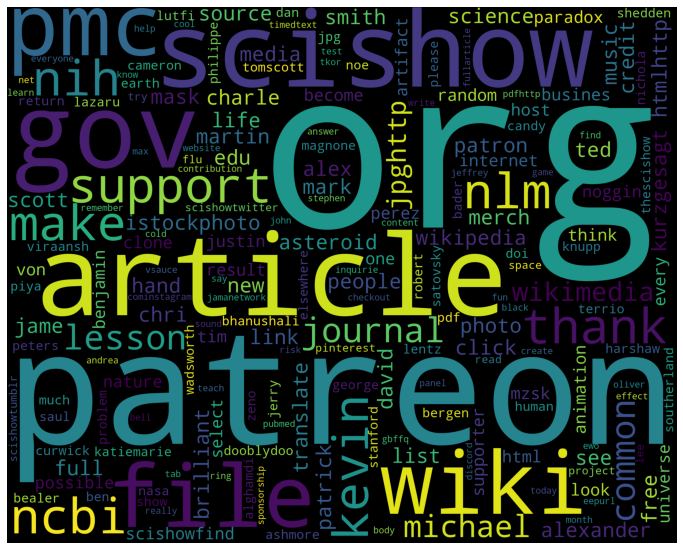

In [29]:
df_1 = df2[df2['category_id']==27]['descriptionsw']

wordcloud1 = WordCloud(stopwords = ["youtube", "amazon", "facebook", "twitter", "instagram", "video", "subscribe", "google", "tumblr", "bitly", "http", "follow", "watch", "channel", "getty", "via", "license", "amazonto," "snapchat"] + list(STOPWORDS),
                      background_color='red',
                      collocations=False,
                      relative_scaling = 0,
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_1))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [ ]:
#create training sets
onetrain = df2[df2['category_id']==1][['descriptionsw', 'category_id']].head(4858)
twotrain = df2[df2['category_id']==2][['descriptionsw', 'category_id']].head(2082)
tentrain = df2[df2['category_id']==10][['descriptionsw', 'category_id']].head(4858)
fifteentrain = df2[df2['category_id']==15][['descriptionsw', 'category_id']].head(2082)
seventeentrain = df2[df2['category_id']==17][['descriptionsw', 'category_id']].head(4858)
nineteentrain = df2[df2['category_id']==19][['descriptionsw', 'category_id']].head(2082)
twentytrain = df2[df2['category_id']==20][['descriptionsw', 'category_id']].head(4858)
twentytwo = df2[df2['category_id']==22][['descriptionsw', 'category_id']].head(2082)
twentthree = df2[df2['category_id']==23][['descriptionsw', 'category_id']].head(4858)
twentfour = df2[df2['category_id']==24][['descriptionsw', 'category_id']].head(2082)
twentfive = df2[df2['category_id']==25][['descriptionsw', 'category_id']].head(4858)
twentsix = df2[df2['category_id']==26][['descriptionsw', 'category_id']].head(2082)
twentseven = df2[df2['category_id']==27][['descriptionsw', 'category_id']].head(4858)
twenteight = df2[df2['category_id']==28][['descriptionsw', 'category_id']].head(2082)
twentnine = df2[df2['category_id']==29][['descriptionsw', 'category_id']].head(4858)
fourtythree = df2[df2['category_id']==43][['descriptionsw', 'category_id']].head(2082)


In [14]:
#create training sets (social media)
onetrain = df2[df2['category_id']==1][['descriptionsw', 'category_id']].head(4858)
twotrain = df2[df2['category_id']==2][['descriptionsw', 'category_id']].head(2082)
tentrain = df2[df2['category_id']==10][['descriptionsw', 'category_id']].head(4858)
fifteentrain = df2[df2['category_id']==15][['descriptionsw', 'category_id']].head(2082)
seventeentrain = df2[df2['category_id']==17][['descriptionsw', 'category_id']].head(4858)
nineteentrain = df2[df2['category_id']==19][['descriptionsw', 'category_id']].head(2082)
twentytrain = df2[df2['category_id']==20][['descriptionsw', 'category_id']].head(4858)
twentytwo = df2[df2['category_id']==22][['descriptionsw', 'category_id']].head(2082)
twentthree = df2[df2['category_id']==23][['descriptionsw', 'category_id']].head(4858)
twentfour = df2[df2['category_id']==24][['descriptionsw', 'category_id']].head(2082)
twentfive = df2[df2['category_id']==25][['descriptionsw', 'category_id']].head(4858)
twentsix = df2[df2['category_id']==26][['descriptionsw', 'category_id']].head(2082)
twentseven = df2[df2['category_id']==27][['descriptionsw', 'category_id']].head(4858)
twenteight = df2[df2['category_id']==28][['descriptionsw', 'category_id']].head(2082)
twentnine = df2[df2['category_id']==29][['descriptionsw', 'category_id']].head(4858)
fourtythree = df2[df2['category_id']==43][['descriptionsw', 'category_id']].head(2082)

In [ ]:
#Create test sets
onetest = df2[df2['category_id']==1][['descriptionsw', 'category_id']].tail(4858)
twotest = df2[df2['category_id']==2][['descriptionsw', 'category_id']].tail(2082)
tentest = df2[df2['category_id']==10][['descriptionsw', 'category_id']].tail(4858)
fifteentest = df2[df2['category_id']==15][['descriptionsw', 'category_id']].tail(2082)
seventeentest = df2[df2['category_id']==17][['descriptionsw', 'category_id']].tail(4858)
nineteentest = df2[df2['category_id']==19][['descriptionsw', 'category_id']].tail(2082)
twentytest = df2[df2['category_id']==20][['descriptionsw', 'category_id']].tail(4858)
twentytwotest = df2[df2['category_id']==22][['descriptionsw', 'category_id']].tail(2082)
twentthreetest = df2[df2['category_id']==23][['descriptionsw', 'category_id']].tail(4858)
twentfourtest = df2[df2['category_id']==24][['descriptionsw', 'category_id']].tail(2082)
twentfivetest = df2[df2['category_id']==25][['descriptionsw', 'category_id']].tail(4858)
twentsixtest = df2[df2['category_id']==26][['descriptionsw', 'category_id']].tail(2082)
twentseventest = df2[df2['category_id']==27][['descriptionsw', 'category_id']].tail(4858)
twenteighttest = df2[df2['category_id']==28][['descriptionsw', 'category_id']].tail(2082)
twentninetest = df2[df2['category_id']==29][['descriptionsw', 'category_id']].tail(4858)
fourtythreetest = df2[df2['category_id']==43][['descriptionsw', 'category_id']].tail(2082)

In [15]:
#Create test sets (Social Media)
onetest = df2[df2['category_id']==1][['descriptionsw', 'category_id']].tail(4858)
twotest = df2[df2['category_id']==2][['descriptionsw', 'category_id']].tail(2082)
tentest = df2[df2['category_id']==10][['descriptionsw', 'category_id']].tail(4858)
fifteentest = df2[df2['category_id']==15][['descriptionsw', 'category_id']].tail(2082)
seventeentest = df2[df2['category_id']==17][['descriptionsw', 'category_id']].tail(4858)
nineteentest = df2[df2['category_id']==19][['descriptionsw', 'category_id']].tail(2082)
twentytest = df2[df2['category_id']==20][['descriptionsw', 'category_id']].tail(4858)
twentytwotest = df2[df2['category_id']==22][['descriptionsw', 'category_id']].tail(2082)
twentthreetest = df2[df2['category_id']==23][['descriptionsw', 'category_id']].tail(4858)
twentfourtest = df2[df2['category_id']==24][['descriptionsw', 'category_id']].tail(2082)
twentfivetest = df2[df2['category_id']==25][['descriptionsw', 'category_id']].tail(4858)
twentsixtest = df2[df2['category_id']==26][['descriptionsw', 'category_id']].tail(2082)
twentseventest = df2[df2['category_id']==27][['descriptionsw', 'category_id']].tail(4858)
twenteighttest = df2[df2['category_id']==28][['descriptionsw', 'category_id']].tail(2082)
twentninetest = df2[df2['category_id']==29][['descriptionsw', 'category_id']].tail(4858)
fourtythreetest = df2[df2['category_id']==43][['descriptionsw', 'category_id']].tail(2082)

In [ ]:
twentytwotest.head()

,descriptiontl,category_id
6,percent dangerou googlenot try home boldly buz...,22
14,protein article free pdf http bitly egd benefi...,22
51,barden bella join drink quickfire conversation...,22
61,best money saving beauty tip boldly buzzfeedye...,22
71,black beauty stick insect specie found tiny ac...,22


In [16]:
# Combine
train_df = pd.concat([onetrain, twotrain, tentrain, fifteentrain, seventeentrain, nineteentrain, twentytrain, twentytwo, twentthree, twentfour, twentfive, twentsix, twentseven, twenteight, twentnine, fourtythree
]).sample(frac = 1).reset_index(drop=True)
test_df = pd.concat([onetest, twotest, tentest, fifteentest, seventeentest, nineteentest, twentytest, twentytwotest,  twentthreetest,  twentfourtest,  twentfivetest,  twentsixtest,  twentseventest, twenteighttest, twentninetest,  fourtythreetest, ]).sample(frac = 1).reset_index(drop=True)


In [17]:
# Assign X_train, X_test, y_train & y_test
X_train = train_df['descriptionsw']
X_test  = test_df['descriptionsw']
y_train = train_df['category_id']
y_test  = test_df['category_id']

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [19]:
# create the tokenizer to tokenize each word
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(X_train)
# encode training data set
Xtrain = tokenizer.texts_to_matrix(X_train, mode='count')
# encode training data set
Xtest = tokenizer.texts_to_matrix(X_test, mode='count')
n_words1 = Xtest.shape[1]

In [20]:
model = tf.keras.models.Sequential([
       
    tf.keras.layers.Dense(256, input_shape=(n_words1,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
          
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [21]:
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer= Adam(0.001),
              metrics=['acc'])

In [23]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]

history = model.fit(Xtrain, y_train,
                    epochs=5,
                    validation_data=(Xtest, y_test,),
                    verbose=1,
                    callbacks=callbacks,
                   )

Epoch 1/5
217/217 [==============================] - 25s 109ms/step - loss: -129.7873 - acc: 0.0304 - val_loss: -402.3850 - val_acc: 0.0180
Epoch 2/5
217/217 [==============================] - 22s 103ms/step - loss: -886.9356 - acc: 0.0160 - val_loss: -1826.1743 - val_acc: 0.0075
Epoch 3/5
217/217 [==============================] - 22s 102ms/step - loss: -2449.0049 - acc: 0.0127 - val_loss: -3784.1418 - val_acc: 0.0055
Epoch 4/5
217/217 [==============================] - 22s 102ms/step - loss: -4695.4282 - acc: 0.0088 - val_loss: -6596.0957 - val_acc: 0.0049
Epoch 5/5
217/217 [==============================] - 22s 101ms/step - loss: -7533.1304 - acc: 0.0082 - val_loss: -9809.6104 - val_acc: 0.0055


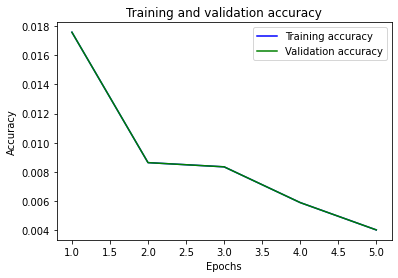

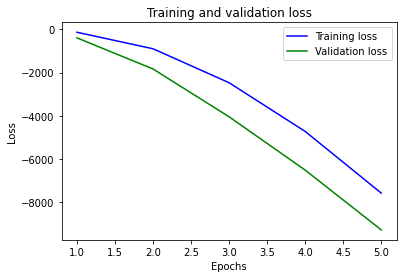

In [ ]:
def plot_history(history):
    accuracy = history.history['val_acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(accuracy) + 1)
    
    # Plot accuracy  
    plt.figure(1)
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.figure(2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
plot_history(history)

In [24]:
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    y_pred = clf_object.predict(X_test) 
    return y_pred

In [ ]:
predictions_keras = prediction(X_test, model)

In [ ]:
pred_ann = [ 1 if y>=0.5 else 0 for y in predictions_keras]

In [ ]:


#calculating the accuracy
accuracy_score = accuracy_score(y_test,pred_ann)
print("Accuracy score with Keras:",accuracy_score)



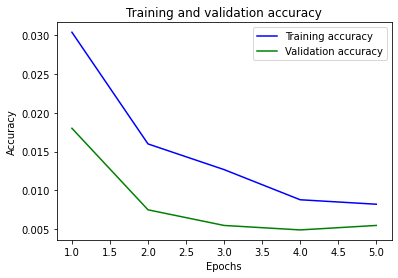

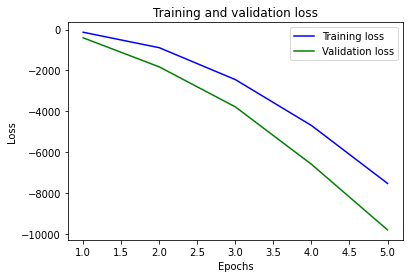

In [27]:
def plot_history(history):
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(accuracy) + 1)
    
    # Plot accuracy  
    plt.figure(1)
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.figure(2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
###### confusion matrix  starts ######
from sklearn.metrics import accuracy_score, confusion_matrix
cm_ann = confusion_matrix(y_test,pred_ann) 
names = np.unique(pred_ann)
sns.heatmap(cm_ann, square=True, annot=True, cbar=False,xticklabels=names, yticklabels=names, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')
###### Confusion matrix ends ########